In [2]:
## Joseph Griffith - G00350112
## EmergingTech - Training the model

In [1]:
import numpy as np
import keras as kr
import matplotlib.pyplot as plt

import keras as kr
import random
##Keras Imports for the MNIST dataset
##from keras.models import Sequential, load_model
##from keras.datasets import mnist
##from keras.layers import Dense
##from keras.optimizers import Adam



Using TensorFlow backend.


In [2]:
## Here we will load the MNIST Dataset into the model using the keras.dataset import
## By doing this the data set is split into train and test sets
(X_train, y_train), (X_test, y_test) = kr.datasets.mnist.load_data()
print("X_train original shape", X_train.shape)
print("X_test original shape", X_test.shape)
print("y_train original shape", y_train.shape)
print("y_test original shape", y_test.shape)


# By using an assert statement we are validating the input
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal .."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal .."
assert(X_train.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"
assert(X_test.shape[1:] == (28, 28)), "The dimension of the images are not 28x28"

X_train original shape (60000, 28, 28)
X_test original shape (10000, 28, 28)
y_train original shape (60000,)
y_test original shape (10000,)


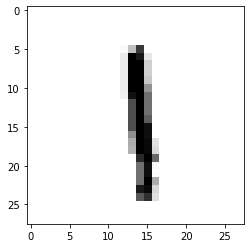

In [3]:
plt.imshow(X_train[8], cmap=plt.cm.binary)

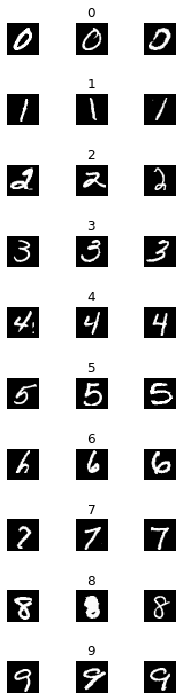

In [4]:

num_of_samples = []

cols = 3 # 3 images are selected randomly
num_of_classes = 10 #each digit total: 10 (showing 3 digits for each number in the dataset)

fig, axs = plt.subplots(nrows=num_of_classes, ncols=cols,
                       figsize=(3, 10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_of_classes):
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(1, len(x_selected -1)),
                                :, :],
                    cmap=plt.get_cmap('gray')) 
    axs[j][i].axis("off")
    if i==1:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

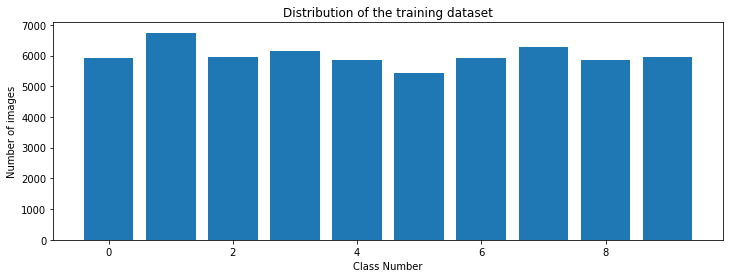

In [5]:
#plot of the distribution of the training set
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_of_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of images")

In [6]:
# each vector used for training an image needs a dimension of 784(28*28) 
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# change values to floats so that we can get decimals after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
X_train = X_train/255
X_test = X_test/255

print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape)
print('Number of images in X_test', X_test.shape)

X_train shape: (60000, 784)
Number of images in X_train (60000, 784)
Number of images in X_test (10000, 784)


In [7]:
## MNIST Dataset 
## 10 unique digits
digits = 10

# Modifying the matrices using keras utilities
y_train = kr.utils.np_utils.to_categorical(y_train, digits)
y_test = kr.utils.np_utils.to_categorical(y_test, digits)

print("One hot vector at index 5 of training labels ", y_train[5])

One hot vector at index 5 of training labels  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
## start by obtaining model from keras
model = kr.models.Sequential()

## Now we will create hidden layers to the network
## for the first 2 layers Relu will be used as i believe it provides better results
## then finish the third layer with a softmax which is used for probability distribution
model.add(kr.layers.Dense(492, activation='relu', input_shape=(784,)))
model.add(kr.layers.Dense(492, activation='relu'))
# Dropout layer exists to avoid overfitting of model
model.add(kr.layers.Dropout(0.2))
model.add(kr.layers.Dense(10, activation='softmax'))
print("model created")

model created


In [10]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
print("COMPILED MODEL !")



COMPILED MODEL !


In [11]:
## fitting and training the model
# Batch size is number of samples that will be testsed
# Epochs is the amount of times the test is repeated
# model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=250)
model.fit(X_train, y_train,batch_size = 50, epochs=10, verbose=1, validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 15s 242us/step - loss: 0.1953 - acc: 0.9410 - val_loss: 0.0979 - val_acc: 0.9698
Epoch 2/10
60000/60000 [==============================] - 14s 230us/step - loss: 0.0830 - acc: 0.9744 - val_loss: 0.0764 - val_acc: 0.9764
Epoch 3/10
60000/60000 [==============================] - 14s 226us/step - loss: 0.0557 - acc: 0.9819 - val_loss: 0.0785 - val_acc: 0.9765
Epoch 4/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.0428 - acc: 0.9868 - val_loss: 0.0720 - val_acc: 0.9774
Epoch 5/10
60000/60000 [==============================] - 13s 224us/step - loss: 0.0347 - acc: 0.9890 - val_loss: 0.0729 - val_acc: 0.9790
Epoch 6/10
60000/60000 [==============================] - 14s 227us/step - loss: 0.0289 - acc: 0.9907 - val_loss: 0.0832 - val_acc: 0.9789
Epoch 7/10
600

In [12]:
## Displays loss and accuracy of model
score = model.evaluate(X_train, y_train, verbose=0)
print('Test cross-entropy loss: %0.9f' % score[0])
print('Test accuracy: %0.9f' % score[1])

Test cross-entropy loss: 0.011262255
Test accuracy: 0.996066667


In [13]:
print("Saving Model")
model.save('Digit_Predicter.h5')
print("Model Saved")

Saving Model
Model Saved


In [14]:
print("Loading Model")
loadedModel = kr.models.load_model('Digit_Predicter.h5')
print("Model Loaded")

Loading Model
Model Loaded


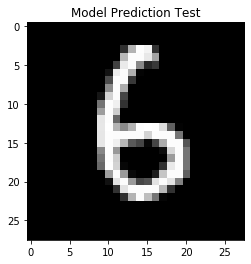

('Digit predicted: ', 6)

In [15]:
## Plots Image that will be sent for prediction
plt.imshow(X_test[21].reshape(28,28), cmap="gray")
plt.title('Model Prediction Test')
plt.show()

## This will return an normalized output for each digit 
## Argmax is used to return the actual prediction
"Digit predicted: ", np.argmax(loadedModel.predict(X_test[21:22]))